In [2]:
import pandas as pd 
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pylab
from pylab import *
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.api as sms


#import csv with housing data
df = pd.read_csv('data/kc_house_data.csv')

In [11]:
def mode_fill(df, column=None):
    if column:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [12]:
# Replace NaN's in 'waterfront' and 'view' columns with the mode. 
mode_fill(df, 'waterfront')
mode_fill(df, 'view')
mode_fill(df, 'yr_renovated')

In [13]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

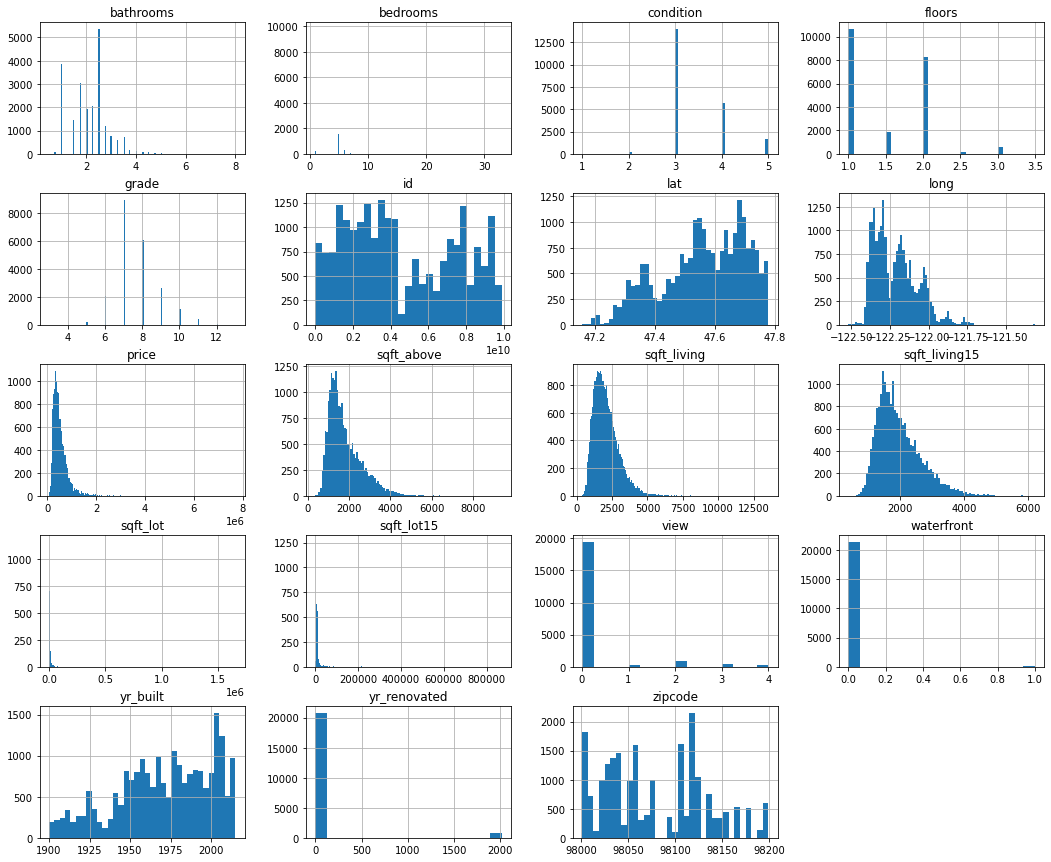

In [7]:
df.hist(figsize=(18,15), bins='auto');

In [8]:
continuous = ['price', 'sqft_living', 'sqft_lot']
categoricals = ['bedrooms', 'bathrooms', 'condition', 'grade', 
                'yr_built']

In [9]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,0.008188,-0.010799,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


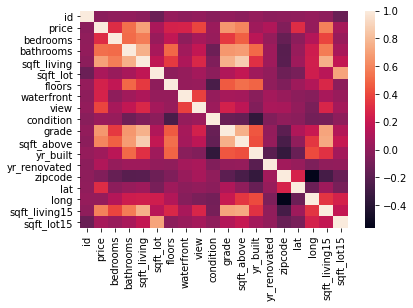

In [18]:
sns.heatmap(df.corr())

In [19]:
#filtering for features with a .5+ correlation with price
corrs = df.corrwith(df['price'])
corrs[corrs > .5].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
dtype: float64

In [17]:
# created a list of the columns with the highest correlation to price,
# excluding sqft_living15 and sqft_above because of multicollinearity with sqft_living

highest_corr = ['sqft_living', 'grade', 'bathrooms']

In [20]:
df['sqft_basement'].value_counts

<bound method IndexOpsMixin.value_counts of 0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: object>

In [21]:
df['sqft_basement'] = df['sqft_basement'].str.replace('?', '0.0')
df['sqft_basement'].value_counts

<bound method IndexOpsMixin.value_counts of 0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: object>

In [22]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [24]:
pd.to_numeric(df['sqft_basement'])

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [25]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


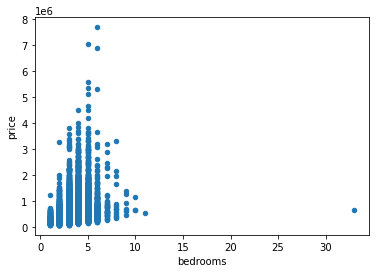

In [26]:
df.plot.scatter(x='bedrooms', y='price')

In [27]:
df = df[df.bedrooms != 33]

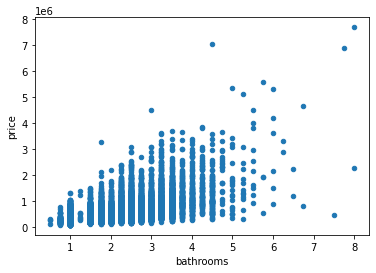

In [28]:
df.plot.scatter(x='bathrooms', y='price')

In [29]:
#simple model comparing sqft_living with price
y = df['price']
X = df['sqft_living']

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:05:47   Log-Likelihood:            -3.0005e+05
No. Observations:               21596   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.401e+04   4410.123     -9.980      0.000   -5.27e+04   -3.54e+04
sqft_living   280.8688      1.939    144.820      0.000     277.067     284.670
==============================================================================
Omnibus:                    14801.492   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542642.481
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
continuous = ['price', 'sqft_living']
categoricals = ['bathrooms', 'grade']

In [32]:
# Log transform and normalize
df_cont = df[continuous]

# log features
log_names = [f'{column}_log' for column in df_cont.columns]

df_log = np.log(df_cont)
df_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log.apply(normalize)

In [30]:
# (0) import OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder

# (1) Create a variable bedrooms
# extracted from df
# (double brackets due to shape expected by OHE)
bedrooms = df[['bedrooms']]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
bed = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

# (3) Fit the encoder on bedrooms
bed.fit(bedrooms)

# (4) Transform bedroom using the encoder and
# assign the result to bed_encoded
bed_encoded = bed.transform(bedrooms)

# (5a) Make the transformed data into a dataframe
bed_encoded = pd.DataFrame(
    # Pass in NumPy array
    bed_encoded,
    # Set the column names to the categories found by OHE
    columns=bed.categories_[0],
    # Set the index to match X_train's index
    index=df.index
)

In [35]:
# (1) Create a variable bedrooms
# extracted from df
# (double brackets due to shape expected by OHE)
bathrooms = df[['bathrooms']]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
bath = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

# (3) Fit the encoder on bathrooms
bath.fit(bathrooms)

# (4) Transform bath using the encoder and
# assign the result to bath_encoded
bath_encoded = bath.fit_transform(bathrooms)

# (5a) Make the transformed data into a dataframe
bath_encoded = pd.DataFrame(
    # Pass in NumPy array
    bath_encoded,
    # Set the column names to the categories found by OHE
    columns=bath.categories_[0],
    # Set the index to match df's index
    index=df.index
)

# (5b) Drop original bathrooms column
#df.drop("bathrooms", axis=1, inplace=True)

# (5c) Concatenate the new dataframe with current df
#df_ohe = pd.concat([df, bath_encoded], axis=1)

In [33]:
grade = df[['grade']]

ovgrade = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

ovgrade.fit(grade)

grade_encoded = ovgrade.transform(grade)

grade_encoded = pd.DataFrame(
    grade_encoded,
    columns=ovgrade.categories_[0],
    index=df.index
)

#df.drop("grade", axis=1, inplace=True)

#df = pd.concat([df, grade_encoded], axis=1)

In [50]:
# add these highly correlated variables to a new dataframe
df_ohe = pd.concat([bath_encoded, grade_encoded], axis=1)

In [51]:
#combining my normalized continuous columns with my dummied categorical columns
preprocessed = pd.concat([df_log_norm, df_ohe], axis=1)
preprocessed.head()

,price_log,sqft_living_log,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,...,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
0,-1.401949,-1.125551,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.279963,0.709415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.799376,-2.131868,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.499719,0.070655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.178459,-0.292737,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [52]:
y = preprocessed['price_log']
X = preprocessed.drop('price_log', axis=1)

In [53]:
X_int2 = sm.add_constant(X)
model = sm.OLS(y,X_int2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     717.9
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:14:30   Log-Likelihood:                -21654.
No. Observations:               21596   AIC:                         4.339e+04
Df Residuals:                   21556   BIC:                         4.371e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4851      0.072      6.751      0.000       0.344       0.626
sqft_living_log     0.3734      0.008     45.959      0.000       0.358       0.389
0.5                -0.6142      0.324     -1.895      0.058      -1.250       0.021
0.75                0.1144      0.099      1.157      0.247      -0.079       0.308
1.0                -0.0455      0.058     -0.783      0.434      -0.159       0.068
1.25                0.1786      0.220      0.813      0.416      -0.252       0.610
1.5                -0.1777      0.059     -3.038      0.002      -0.292      -0.063
1.75               -0.1383      0.057     -2.437      0.015      -0.250      -0.027
2.0                -0.1323      0.057     -2.303      0.021      -0.245      -0.020
2.25               -0.2326      0.057     -4.078      0.000      -0.344      -0.121
2.5                -0.3885      0.056     -6.981      0.000      -0.498      -0.279
2.75               -0.1744      0.058     -3.013      0.003      -0.288      -0.061
3.0                -0.1343      0.059     -2.258      0.024      -0.251      -0.018
3.25               -0.0337      0.060     -0.559      0.576      -0.152       0.084
3.5                -0.1472      0.059     -2.493      0.013      -0.263      -0.031
3.75                0.1211      0.074      1.632      0.103      -0.024       0.266
4.0                 0.0411      0.076      0.539      0.590      -0.108       0.191
4.25                0.1599      0.089      1.791      0.073      -0.015       0.335
4.5                 0.0028      0.084      0.033      0.973      -0.161       0.167
4.75                0.4452      0.143      3.115      0.002       0.165       0.725
5.0                 0.0313      0.148      0.211      0.833      -0.259       0.322
5.25                0.2037      0.185      1.101      0.271      -0.159       0.566
5.5                 0.2317      0.210      1.105      0.269      -0.179       0.643
5.75               -0.1095      0.326     -0.336      0.737      -0.748       0.529
6.0                 0.4968      0.271      1.835      0.067      -0.034       1.027
6.25                0.4016      0.462      0.869      0.385      -0.504       1.307
6.5                -0.3905      0.455     -0.858      0.391      -1.282       0.502
6.75               -0.2645      0.455     -0.581      0.561      -1.157       0.628
7.5                -0.6321      0.640     -0.987      0.323      -1.887       0.623
7.75                1.3011      0.667      1.951      0.051      -0.006       2.608
8.0                 0.3711      0.463      0.801      0.423      -0.537       1.279
3.0                -0.5443      0.610     -0.892      0.372      -1.740       0.651
4.0                -1.2553      0.135     -9.314      0.000      -1.519      -0.991
5.0                -1.1704      0.073    -16.043      0.000

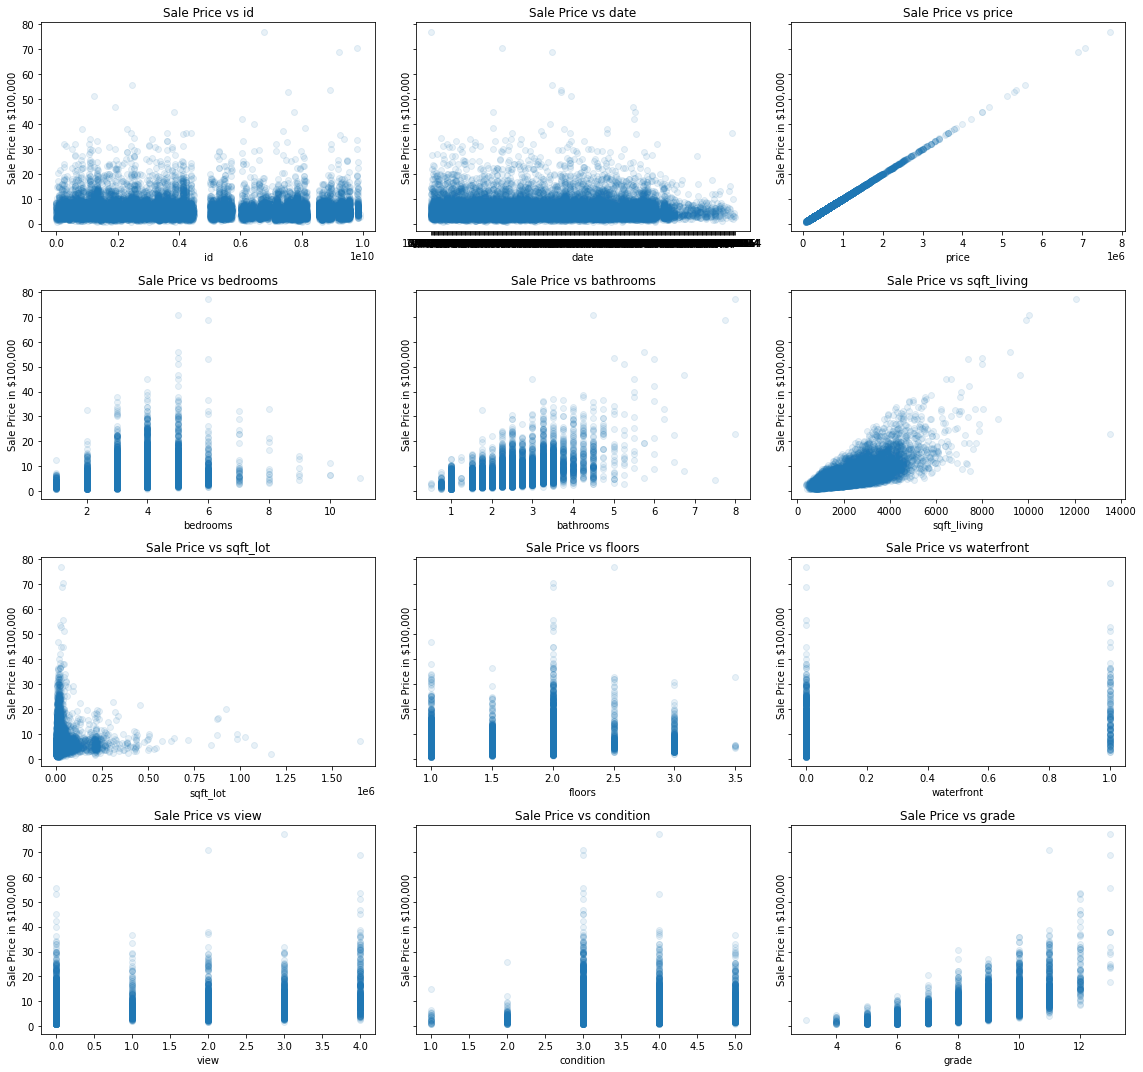

In [54]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()